<a href="https://colab.research.google.com/github/minmings111/AICA_study/blob/main/AICA_2025_08_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 2025.08.12. --1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [ ]:
Data_set = np.loadtxt('./data/ThoraricSurgery3.csv', delimiter=',')
print(type(Data_set))

<class 'numpy.ndarray'>


In [ ]:
X = Data_set[:, 0:16]
Y = Data_set[:, 16]

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, Y, epochs=5, batch_size=16)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8358 - loss: 0.4691
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8585 - loss: 0.4199
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8423 - loss: 0.4225
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8462 - loss: 0.4210
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8819 - loss: 0.3627


In [ ]:
# 2025.08.12. --2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./data/pima-indians-diabetes3.csv')
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df["diabetes"].value_counts()
df.describe()
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

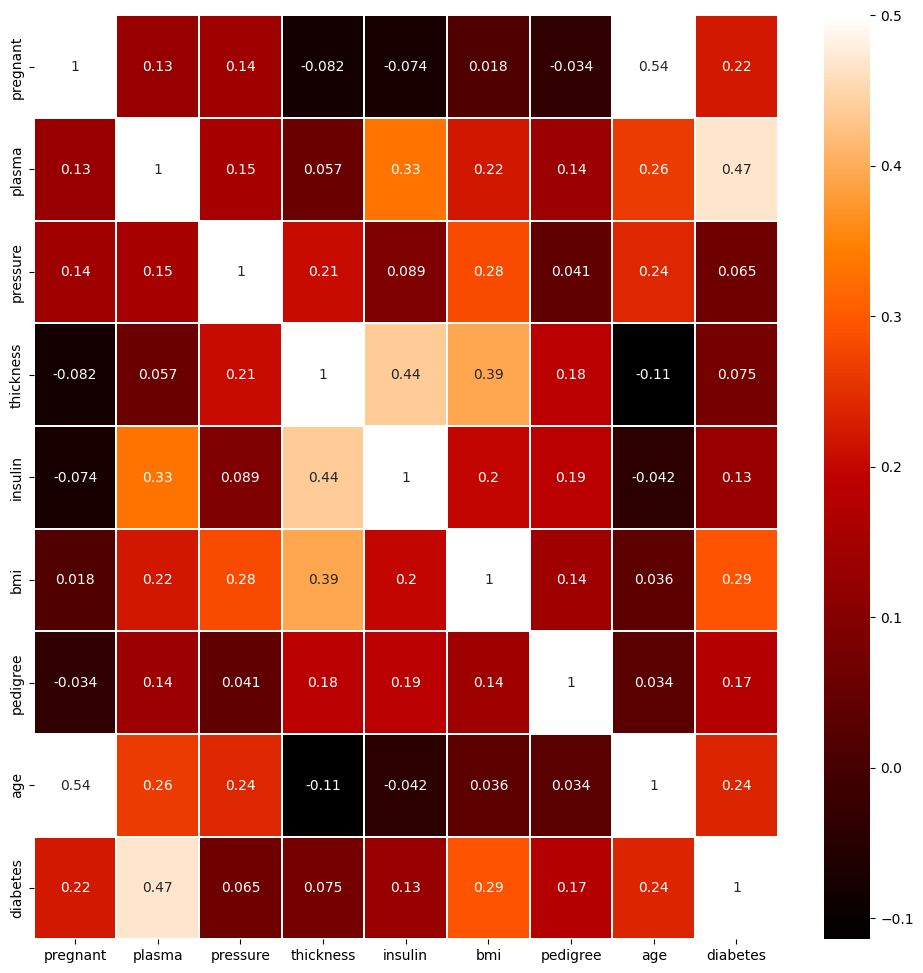

In [ ]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(12,12))

sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap,
            linecolor='white', annot=True)

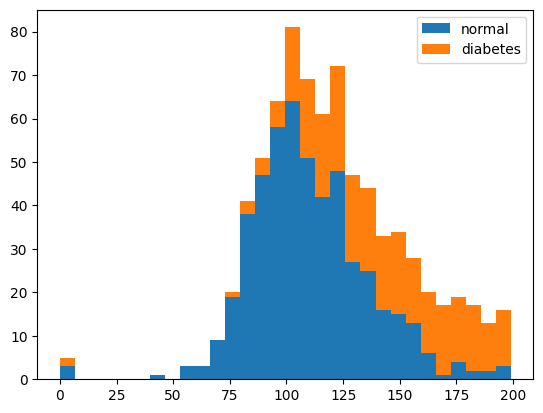

In [ ]:
plt.hist(x=[df.plasma[df.diabetes == 0], df.plasma[df.diabetes == 1]], bins=30,
         histtype='barstacked', label=['normal', 'diabetes'])

plt.legend()
plt.show()

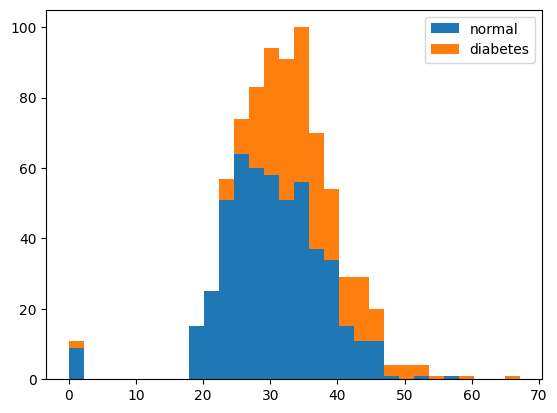

In [ ]:
plt.hist(x=[df.bmi[df.diabetes == 0], df.bmi[df.diabetes == 1]], bins=30,
         histtype='barstacked', label=['normal', 'diabetes'])

plt.legend()
plt.show()

In [ ]:
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid', name='Dense_3'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense_1 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7550 - loss: 0.5118
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7911 - loss: 0.4698
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7658 - loss: 0.4868
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7697 - loss: 0.5221
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7767 - loss: 0.4839
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7786 - loss: 0.4712
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7846 - loss: 0.4917
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7721 - loss: 0.4752
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7326 - loss: 0.5116
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7724 - loss: 0.5114
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7609 - loss: 0.4842
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
sample_data = np.array([[5,	128,	70,	20,	0,	35.6,	0.5, 40]])

In [ ]:
pridiction = model.predict(sample_data)
print("예측확률:", pridiction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
예측확률: 0.57077396


In [ ]:
predicted_class =  int(pridiction[0][0] > 0.5)
print("예측결과 (0:없음, 1:있음)", predicted_class)

예측결과 (0:없음, 1:있음) 1


In [ ]:
# 2025.08.12. --3
import pandas as pd

df = pd.read_csv('./data/sonar3.csv', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [ ]:
df[60].value_counts()

,count
60,
1,111
0,97


In [ ]:
X = df.iloc[:, 0:60]
y = df.iloc[:,60]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=200, batch_size=10)

Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5330 - loss: 0.6922
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5381 - loss: 0.6717
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5327 - loss: 0.6634
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5268 - loss: 0.6579
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5054 - loss: 0.6494 
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5327 - loss: 0.6365 
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5871 - loss: 0.6347 
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6128 - loss: 0.6258
Epoch 9/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5884 - loss: 0.6319 
Epoch 10/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6743 - loss: 0.5879 
Epoch 11/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7189 - loss: 0.5840 
Epoch 12/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - ac

In [ ]:
# 2025.08.12. --4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import load_model

import pandas as pd

In [ ]:
df = pd.read_csv('./data/sonar3.csv', header = None)
X = df.iloc[:,0:60]
y = df.iloc[:, 60]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle= True)

In [ ]:
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = model.fit(X_train, y_train, epochs=200, batch_size=10)

history = model.fit(X_train, y_train, epochs=200, batch_size=10,
                    validation_data=(X_test, y_test))

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.4809 - loss: 0.7113 - val_accuracy: 0.5079 - val_loss: 0.6810
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5354 - loss: 0.6699 - val_accuracy: 0.5079 - val_loss: 0.6720
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5447 - loss: 0.6636 - val_accuracy: 0.5556 - val_loss: 0.6608
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6295 - loss: 0.6449 - val_accuracy: 0.6349 - val_loss: 0.6522
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6326 - loss: 0.6405 - val_accuracy: 0.6349 - val_loss: 0.6450
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6610 - loss: 0.6414 - val_accuracy: 0.6667 - val_loss: 0.6361
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7336 - loss: 0.6157 - val_accuracy: 0.6667 - val_loss: 0.6294
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6872 - loss: 0.6211 - val_accuracy: 0.6508 - val_loss: 0.

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8211 - loss: 0.6353
Test accuracy: 0.8253968358039856


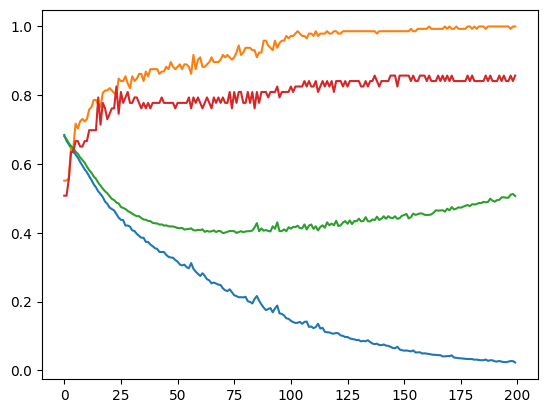

In [ ]:
import matplotlib.pyplot as plt

test_loss = score[0]
test_accuracy = score[1]

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])

plt.show()

In [ ]:
model.save('./data/model/my_model.keras', save_format = 'tf')

In [ ]:
del model

In [ ]:
model = load_model('./data/model/my_model.keras')

score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.8423 - loss: 0.5582
Test accuracy: 0.8571428656578064
